<a href="https://colab.research.google.com/github/FGalvao77/-NOVA-VERSAO---Prevendo-ocorrencias-de-diabetes/blob/main/(NOVA_VERS%C3%83O)_Prevendo_ocorr%C3%AAncias_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo ocorrências de diabetes**

---



## **INTRODUÇÃO**


### **`O que é diabetes?`**
 
_Diabetes, conhecida cientificamente como **Diabetes mellitus**, é uma doença metabólica crônica caracterizada pelo aumento, falta e ou má absorção de insulina, hormônio que promove o aproveitamento da glicose como energia para o corpo._


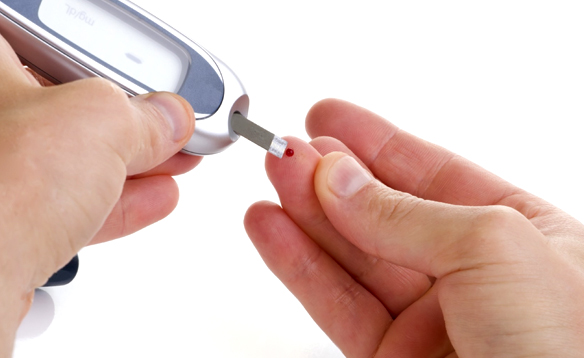

A doença é considerada `o mal do século` pelos orgãos de saúde internacionais e, de acordo com a [OMS](https://www.paho.org/bra/index.php?option=com_content&view=article&id=394:diabetes-mellitus&Itemid=463) – [**Organização Mundial da Saúde**](https://www.paho.org/pt/brasil) -, cerca de 16 milhões de brasileiros sofrem com a diabetes e segundo o mesmo orgão nos últimos dez anos a taxa de incidência cresceu mais de 60%. Por isso, foi acesso um alerta quanto a qualidade de vida da população.

Este problema ganhou destaque nos orgãos públicos, onde já há projetos de estudos para prevenção e tratamentos de diabetes.

**[Câmara analisa propostas para combater disseminação de diabetes](https://www.camara.leg.br/noticias/707533-camara-analisa-propostas-para-combater-disseminacao-de-diabetes/)**

_Projetos sugerem desde a criação de centros para o atendimento integral ao diabético no SUS até a isenção de impostos e oferecimento de merenda escolar especial para quem tem a doença, que atinge mais de 16 milhões de brasileiros_ 
 - 13/11/2020 - 14:12  

Fonte: Agência Câmara de Notícias

Até planos privados de sáude já adotam iniciativas para prevenção do problema de diabetes

**[DIABETES – O MAL DO SÉCULO QUE CRESCE A CADA ANO](https://www.unimedcampinas.com.br/Novidades/Interna/MzQx/diabetes-medicina-preventiva-unimed-campinas)**
 - PUBLICADO 02/01/2019



Portanto é de interesse comum, seja ele público ou privado, que esse `"mal do século"` tenha um cuidado em especial com políticas de saúde para diminuição da incidência da doença na população em geral.

Como estudo e conhecimento foi elaborado essa análise de dados sobre algumas informações comportamentais de indivíduos. Essa base de dados foi coletado por meio de questionários diretos de pacientes do
`Hospital de Diabetes Sylhet em Sylhet de Bangladesh`, e aprovado por um médico.

Mas como efeito de predição ela nos fornece algumas informações importantes, pois essa doença tem abragência mundial.

**_Vamos iniciar nossa análise!_**

### Importando as bibliotecas e as funções necessárias para análise

In [34]:
# importando as bibliotecas e verificando as suas versões
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn

# verificando as versões utilizadas
print('Versões das bibliotecas utilizadas:')
print(f'Numpy:      {np.__version__}')
print(f'Pandas:     {pd.__version__}')
print(f'Sklearn:    {sklearn.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn:    {seaborn.__version__}')

Versões das bibliotecas utilizadas:
Numpy:      1.19.5
Pandas:     1.3.5
Sklearn:    1.0.2
Matplotlib: 3.2.2
Seaborn:    0.11.2


In [ ]:
# comando para atualizar os pacotes se necessário
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade sklearn
# !pip install --upgrade matplotlib

In [49]:
# importando as demais bibliotecas 

# visualização gráfica
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# métricas de avaliação
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             plot_confusion_matrix, 
                             roc_curve)

# funções para validação cruzada, curva de aprendizagem e particionamento dos dados
from sklearn.model_selection import (cross_val_score, 
                                    learning_curve,
                                    train_test_split)

# funções dos modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

### Coleta dos dados e análise exploratória

- link do dataset utilizado: 

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#

In [ ]:
# from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
# uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [7]:
# importando o conjunto de dados
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv

--2022-02-01 22:29:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34682 (34K) [application/x-httpd-php]
Saving to: ‘diabetes_data_upload.csv’

diabetes_data_uploa 100%[===================>]  33.87K  --.-KB/s    in 0.1s    

2022-02-01 22:29:48 (256 KB/s) - ‘diabetes_data_upload.csv’ saved [34682/34682]



In [10]:
# visualizando o diretório principal
%ls

diabetes_data_upload.csv  sample_data/


In [11]:
# visualizando o conjunto de dados
!head diabetes_data_upload.csv

Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive


In [12]:
# realizando o carregamento do conjunto de dados
diabetes = pd.read_csv('diabetes_data_upload.csv')

In [13]:
# verificando as 5 primeiras linhas
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [14]:
# traduzindo o nome das colunas
colunas_traduzidas = [
                      'Idade',
                      'Gênero',
                      'Poliúria',
                      'Polidispsia',
                      'Perda repentina de peso',
                      'Fraqueza',
                      'Polifagia',
                      'Candidiase',
                      'Visão embaçada',
                      'Coceira',
                      'Irritações',
                      'Cicatrização prolongada',
                      'Paralisia parcial',
                      'Fraqueza muscular',
                      'Calvice',
                      'Obesidade',
                      'Diabetes'
]

In [15]:
# carregando novamente o conjunto de dados com as colunas traduzidas
diabetes = pd.read_csv('diabetes_data_upload.csv',
                       names=colunas_traduzidas, 
                       skiprows=1)

### Análise exploratória e visualização dos dados

In [18]:
# exibindo as 15 primeiras linhas
diabetes.head(15).T # para melhor visualização, estamos realizando a transposição 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Idade,40,58,41,45,60,55,57,66,67,70,44,38,35,61,60
Gênero,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
Poliúria,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
Polidispsia,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
Perda repentina de peso,No,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No
Fraqueza,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes
Polifagia,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes
Candidiase,No,No,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,No
Visão embaçada,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes
Coceira,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes


In [23]:
# visualizando as 5 primeiras e as 5 últimas linhas
display(
    diabetes.head(),
    diabetes.tail()
)

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [25]:
# verificando o nomes dos atributos
diabetes.columns

Index(['Idade', 'Gênero', 'Poliúria', 'Polidispsia', 'Perda repentina de peso',
       'Fraqueza', 'Polifagia', 'Candidiase', 'Visão embaçada', 'Coceira',
       'Irritações', 'Cicatrização prolongada', 'Paralisia parcial',
       'Fraqueza muscular', 'Calvice', 'Obesidade', 'Diabetes'],
      dtype='object')

In [35]:
# quantidade de linhas e colunas
# diabetes.shape
print(f'Quantidades: \nLinhas: {diabetes.shape[0]} e, \nColunas: {diabetes.shape[1]}')

Quantidades: 
Linhas: 520 e, 
Colunas: 17


In [36]:
# distribuição de variável alvo
diabetes['Diabetes'].value_counts()

Positive    320
Negative    200
Name: Diabetes, dtype: int64

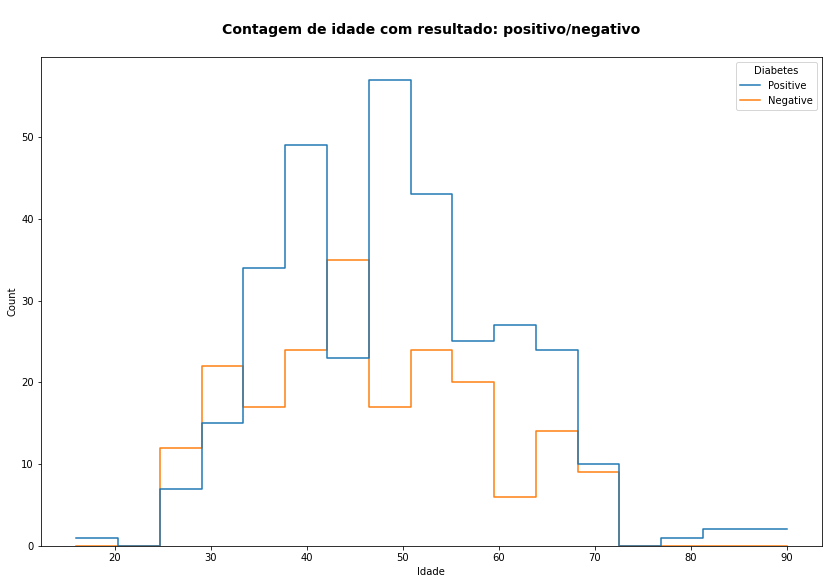

In [51]:
# gráfico da contagem da relação dos atributos Idade X Diabetes
plt.figure(figsize=(14,9))

plt.title('\nContagem de idade com resultado: positivo/negativo\n', 
          {'fontsize': 14,'fontweight': 'bold'})
sns.histplot(data=diabetes, x='Idade', hue='Diabetes', element= 'step', fill=False);

In [52]:
# informações gerais
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Idade                    520 non-null    int64 
 1   Gênero                   520 non-null    object
 2   Poliúria                 520 non-null    object
 3   Polidispsia              520 non-null    object
 4   Perda repentina de peso  520 non-null    object
 5   Fraqueza                 520 non-null    object
 6   Polifagia                520 non-null    object
 7   Candidiase               520 non-null    object
 8   Visão embaçada           520 non-null    object
 9   Coceira                  520 non-null    object
 10  Irritações               520 non-null    object
 11  Cicatrização prolongada  520 non-null    object
 12  Paralisia parcial        520 non-null    object
 13  Fraqueza muscular        520 non-null    object
 14  Calvice                  520 non-null    o

In [53]:
# checando se há valores ausentes
diabetes.isna().sum()

Idade                      0
Gênero                     0
Poliúria                   0
Polidispsia                0
Perda repentina de peso    0
Fraqueza                   0
Polifagia                  0
Candidiase                 0
Visão embaçada             0
Coceira                    0
Irritações                 0
Cicatrização prolongada    0
Paralisia parcial          0
Fraqueza muscular          0
Calvice                    0
Obesidade                  0
Diabetes                   0
dtype: int64

In [39]:
# checando valores se há valores nulos
# diabetes.isnull().count()
diabetes.isnull().value_counts().sum()

520

In [40]:
# estatística discritiva do dataset
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [41]:
# estatística discritiva do dataset, dos dados do tipo "object"
diabetes.describe(include='O').T

,count,unique,top,freq
Gênero,520,2,Male,328
Poliúria,520,2,No,262
Polidispsia,520,2,No,287
Perda repentina de peso,520,2,No,303
Fraqueza,520,2,Yes,305
Polifagia,520,2,No,283
Candidiase,520,2,No,404
Visão embaçada,520,2,No,287
Coceira,520,2,No,267
Irritações,520,2,No,394


In [44]:
# estatística descritiva da "Idade"
diabetes['Idade'].describe().round(0)

count    520.0
mean      48.0
std       12.0
min       16.0
25%       39.0
50%       48.0
75%       57.0
max       90.0
Name: Idade, dtype: float64

In [45]:
# idade média dos pacientes
print(f"Idade média dos pacientes é de {diabetes['Idade'].mean():.2f} anos.")

Idade média dos pacientes é de 48.03 anos.


In [46]:
# idade máxima dos pacientes
print(f"Idade máxima dos pacientes é de {diabetes['Idade'].max():.2f} anos.")

Idade máxima dos pacientes é de 90.00 anos.


In [47]:
# idade mínima dos pacientes
print(f"Idade mínima dos pacientes é de {diabetes['Idade'].min():.2f} anos.")

Idade mínima dos pacientes é de 16.00 anos.


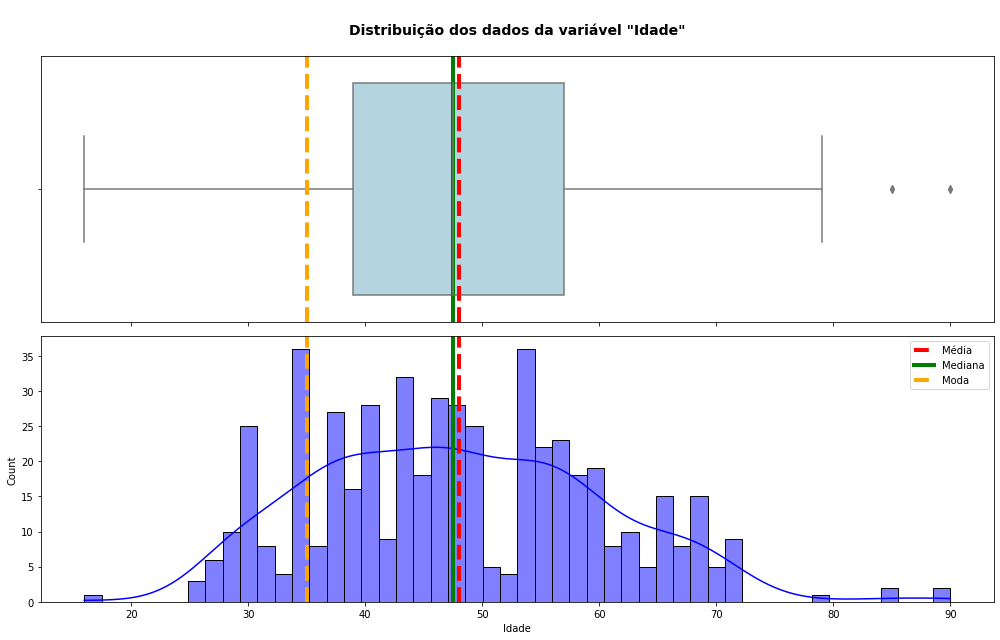

In [59]:
# plotando gráficos - boxplot e histograma da distribuição dos dados da variável "Age" (idade)
mean = diabetes['Idade'].mean()
median = diabetes['Idade'].median()
mode = diabetes['Idade'].mode()[0]

fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                      figsize=(14,9))

sns.boxplot(data=diabetes, x='Idade', ax=ax_box, color='lightblue')
ax_box.axvline(mean, color='red', linestyle='--', linewidth=4)
ax_box.axvline(median, color='green', linestyle='-', linewidth=4)
ax_box.axvline(mode, color='orange', linestyle='--', linewidth=4)
ax_box.set(xlabel='')
ax_box.set_title('\nDistribuição dos dados da variável "Idade"\n',
                 {'fontsize': 14,'fontweight': 'bold'})

sns.histplot(data=diabetes, x='Idade', ax=ax_hist, kde=True, bins=50, color='blue')
ax_hist.axvline(mean, color='red', linestyle='--', label='Média', linewidth=4)
ax_hist.axvline(median, color='green', linestyle='-', label='Mediana', linewidth=4)
ax_hist.axvline(mode, color='orange', linestyle='--', label='Moda', linewidth=4)

ax_hist.legend()
plt.tight_layout();

In [60]:
# verificando valores únicos para cada atributo
diabetes.nunique()

Idade                      51
Gênero                      2
Poliúria                    2
Polidispsia                 2
Perda repentina de peso     2
Fraqueza                    2
Polifagia                   2
Candidiase                  2
Visão embaçada              2
Coceira                     2
Irritações                  2
Cicatrização prolongada     2
Paralisia parcial           2
Fraqueza muscular           2
Calvice                     2
Obesidade                   2
Diabetes                    2
dtype: int64

In [61]:
# verificando o tipo de dados dos atributos
diabetes.dtypes

Idade                       int64
Gênero                     object
Poliúria                   object
Polidispsia                object
Perda repentina de peso    object
Fraqueza                   object
Polifagia                  object
Candidiase                 object
Visão embaçada             object
Coceira                    object
Irritações                 object
Cicatrização prolongada    object
Paralisia parcial          object
Fraqueza muscular          object
Calvice                    object
Obesidade                  object
Diabetes                   object
dtype: object

### Pré-processamento dos dados

In [66]:
# criando uma cópia do dataset e instanciando em uma nova variável "df_diabetes"
df_diabetes = diabetes.copy()

Na etapa que segue abaixo, iremos realizar a transformação dos dados, pois como visto acima temos tipo de dados `object` que representa  _dados categóricos_ e devemos transforma-los para `numéricos`.

Isso é necssário, já que os modelos (algoritmos) de _Machine Learning_ necessita desse tipo de transformação para serem executados.

In [67]:
# realizando a conversão dos dados para categóricos para numéricos
for col in df_diabetes.select_dtypes(include='object').columns:
  df_diabetes[col] = df_diabetes[col].astype('category')

  # imprimindo o mapeamento
  print(col, '\t', dict(enumerate(df_diabetes[col].cat.categories)), end='\n\n')

  df_diabetes[col] = df_diabetes[col].cat.codes

Gênero 	 {0: 'Female', 1: 'Male'}

Poliúria 	 {0: 'No', 1: 'Yes'}

Polidispsia 	 {0: 'No', 1: 'Yes'}

Perda repentina de peso 	 {0: 'No', 1: 'Yes'}

Fraqueza 	 {0: 'No', 1: 'Yes'}

Polifagia 	 {0: 'No', 1: 'Yes'}

Candidiase 	 {0: 'No', 1: 'Yes'}

Visão embaçada 	 {0: 'No', 1: 'Yes'}

Coceira 	 {0: 'No', 1: 'Yes'}

Irritações 	 {0: 'No', 1: 'Yes'}

Cicatrização prolongada 	 {0: 'No', 1: 'Yes'}

Paralisia parcial 	 {0: 'No', 1: 'Yes'}

Fraqueza muscular 	 {0: 'No', 1: 'Yes'}

Calvice 	 {0: 'No', 1: 'Yes'}

Obesidade 	 {0: 'No', 1: 'Yes'}

Diabetes 	 {0: 'Negative', 1: 'Positive'}



In [68]:
# visualizando a transformação
df_diabetes.dtypes

Idade                      int64
Gênero                      int8
Poliúria                    int8
Polidispsia                 int8
Perda repentina de peso     int8
Fraqueza                    int8
Polifagia                   int8
Candidiase                  int8
Visão embaçada              int8
Coceira                     int8
Irritações                  int8
Cicatrização prolongada     int8
Paralisia parcial           int8
Fraqueza muscular           int8
Calvice                     int8
Obesidade                   int8
Diabetes                    int8
dtype: object

In [69]:
# visualizando as 5 primeiras linhas do conjunto de dados após o tratamento
df_diabetes.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [72]:
# separando as variáveis explicativas (X) e a variável resposta/alvo (y)
X = df_diabetes.drop(['Diabetes'], axis=1)
y = df_diabetes['Diabetes']

In [73]:
# visualizando 5 primeiras linhas
X.head()

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [74]:
# contabilizando a distribuição das instâncias do atributo alvo
y.value_counts()

1    320
0    200
Name: Diabetes, dtype: int64

In [76]:
# particionando o conjunto de dados em partes para treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

### Treinando os modelos

In [77]:
# instanciando os classificadores que será utilizados
clfs = {
    'KNN': KNeighborsClassifier(n_neighbors=2, n_jobs=-1),

    'SVM Linear': SVC(kernel='linear', C=0.025),
        
    'SVM com Kernel RBF': SVC(gamma=2, C=1, probability=True, random_state=42),
        
    'Árvore de Decisão': DecisionTreeClassifier(max_depth=5, random_state=42),

    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10, n_jobs=-1, random_state=42),
        
    'Rede Neural': MLPClassifier(alpha=1, max_iter=1_500, random_state=42),
        
    'Naive Bayes': GaussianNB(),
    
    'QDA': QuadraticDiscriminantAnalysis()
}

Link para documentação dos classificadores:

- KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Classificador SVM (Kernel Linear e Radial): https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- Árvore de Decisão: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- Rede Neural (Perceptron multi-camadas): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

- Análise Discriminante Quadrática: https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html


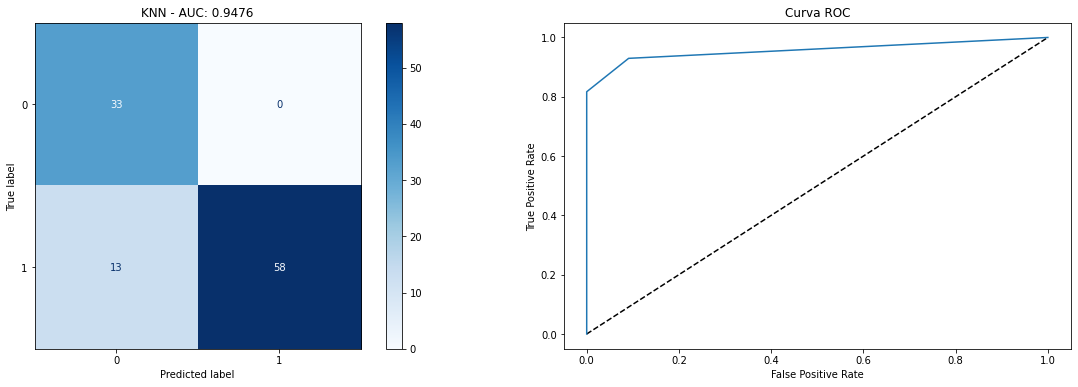

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        33
           1       1.00      0.82      0.90        71

    accuracy                           0.88       104
   macro avg       0.86      0.91      0.87       104
weighted avg       0.91      0.88      0.88       104

----------------------------------------------------------------------------------------------------------------------------------



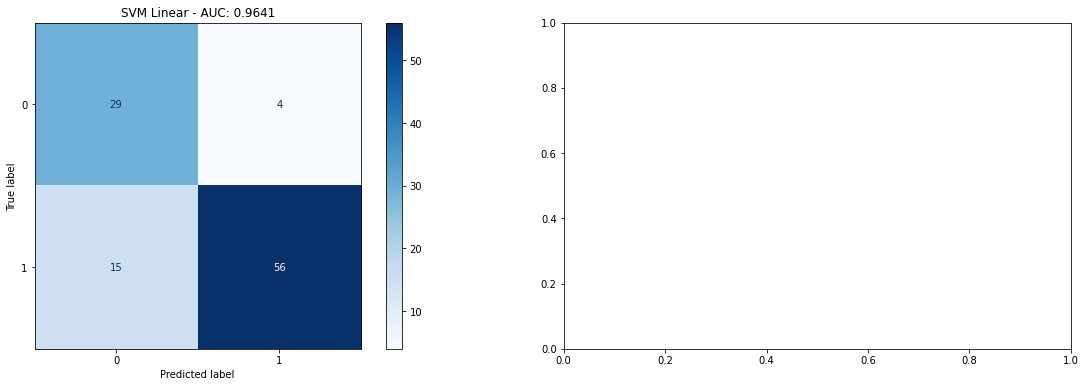

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        33
           1       0.93      0.79      0.85        71

    accuracy                           0.82       104
   macro avg       0.80      0.83      0.80       104
weighted avg       0.85      0.82      0.82       104

----------------------------------------------------------------------------------------------------------------------------------



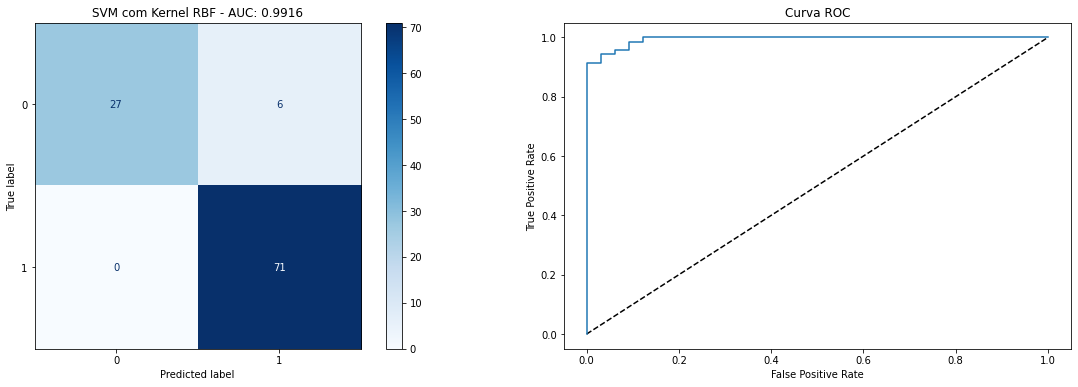

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.92      1.00      0.96        71

    accuracy                           0.94       104
   macro avg       0.96      0.91      0.93       104
weighted avg       0.95      0.94      0.94       104

----------------------------------------------------------------------------------------------------------------------------------



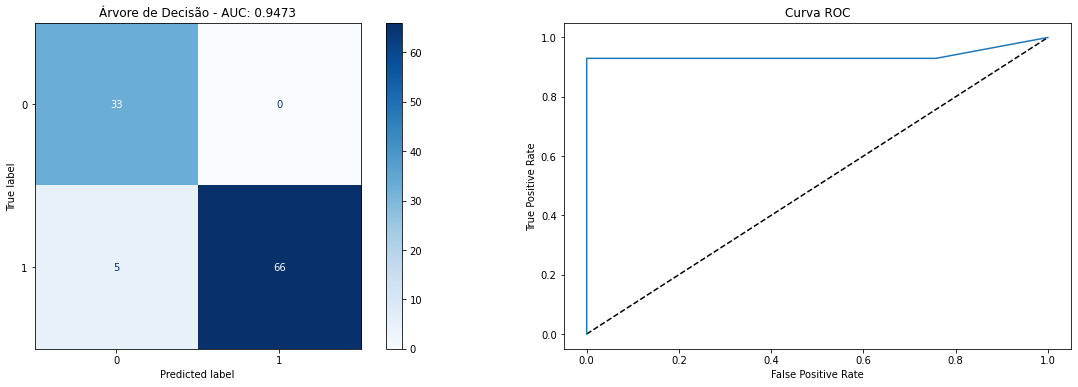

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

----------------------------------------------------------------------------------------------------------------------------------



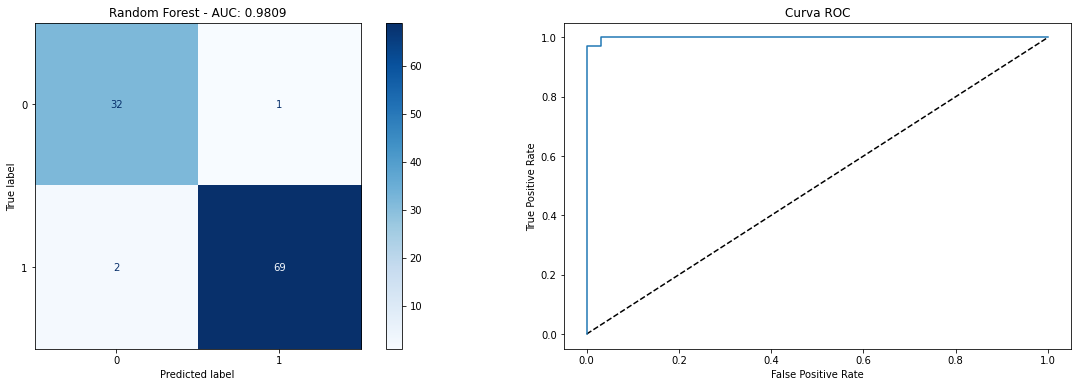

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.97      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104

----------------------------------------------------------------------------------------------------------------------------------



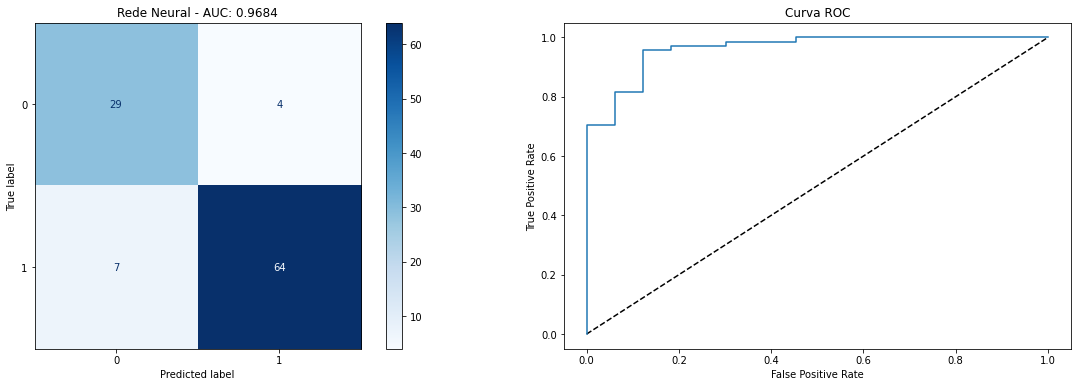

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.94      0.90      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.89      0.88       104
weighted avg       0.90      0.89      0.90       104

----------------------------------------------------------------------------------------------------------------------------------



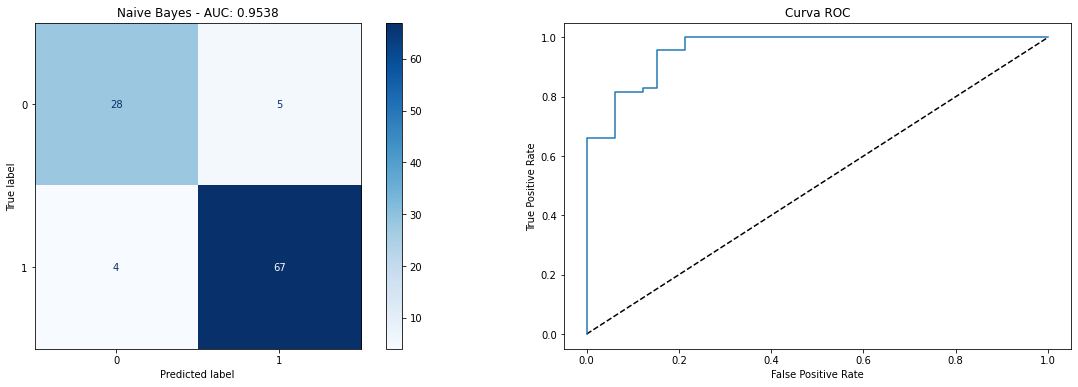

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

----------------------------------------------------------------------------------------------------------------------------------



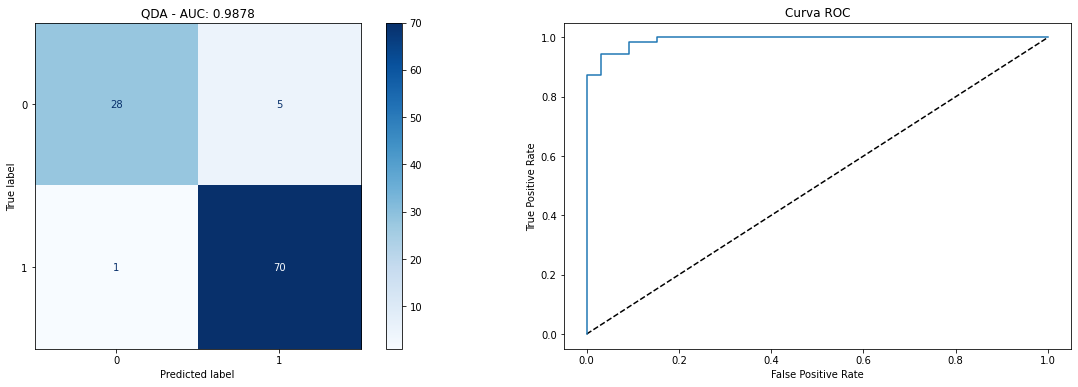

              precision    recall  f1-score   support

           0       0.97      0.85      0.90        33
           1       0.93      0.99      0.96        71

    accuracy                           0.94       104
   macro avg       0.95      0.92      0.93       104
weighted avg       0.94      0.94      0.94       104

----------------------------------------------------------------------------------------------------------------------------------



In [78]:
# treinando os classificadores
for name, clf in clfs.items():

  # treina o modelo
  clf.fit(X_train, y_train)

  # calcula a métrica AUC
  cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
  
  auc = np.mean(cv_auc).round(4)
  
  # realiza previsões com o modelo
  y_pred = clf.predict(X_test)

  # plota matriz de confusão
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
  
  plot_confusion_matrix(clf, X_test, y_test, ax=ax1, cmap='Blues')
  ax1.set_title(f'{name} - AUC: {auc}')

  # plota a curva quando algoritmo cálcula as probabilidades
  if hasattr(clf, 'predict_proba'):

    # previsões de probabilidades para cada classe
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    # gera dados para curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # plota curva ROC
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr, tpr)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC')

  # apresenta o plot
  plt.show()

  # imprime todas as métricas do modelo
  print(classification_report(y_test, y_pred), end='\n')
  print('-'*130, end='\n\n')

Link para as funções utilizadas:

- Métricas utilizando validação cruzada: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

- Plotagem da matrix de confusão: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

- Coletar dados da curva ROC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

- Gerar relatŕio com todas as métricas de calssificação: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### Modelos promissores

In [79]:
# selecionando os 3 modelos mais promissores

# SVM com kernel RBF
svm = SVC(gamma=2, C=1, probability=True, random_state=42)
modelo_svm = svm.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10, n_jobs=-1, random_state=42)
modelo_rf = rf.fit(X_train, y_train)

# Análise Discriminante Quadrática
qda = QuadraticDiscriminantAnalysis()
modelo_qda = qda.fit(X_train, y_train)

A escolha acima foi baseada nas maiores métricas AUC dentre os modelos apresentados.

Também foi considerado que, para o problema de negócio em questão, cometer um erro falso negativo é mais grave do que o erro falso positivo.


In [80]:
# função para plotar curva de aprendizado
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
  if axes is None:
    _, axes = plt.subplots(figsize=(15, 8))

  axes.set_title(title)

  if ylim is not None:
      axes.set_ylim(*ylim)

  axes.set_xlabel('Nº de registros')
  axes.set_ylabel('Acurácia')

  # obtenção dos dados
  train_sizes, train_scores, test_scores, fit_times, _ = \
    learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                   train_sizes=train_sizes, 
                   return_times=True)
    
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)

  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  # plotagem da curva
  axes.grid()

  axes.fill_between(train_sizes, 
                  train_scores_mean - train_scores_std, 
                  train_scores_mean + train_scores_std, 
                  alpha=0.1, color='r')
  
  axes.fill_between(train_sizes, 
                  test_scores_mean - test_scores_std, 
                  test_scores_mean + test_scores_std, 
                  alpha=0.1, color='g')
  
  axes.plot(train_sizes, train_scores_mean, 
          'o-', color='r', label='Dados de treino')
  
  axes.plot(train_sizes, test_scores_mean, 
          'o-', color='g', label='Dados de teste com validação cruzada')
  
  axes.legend(loc='best')

  return plt

Link para função complete (Scikit-Learn): https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

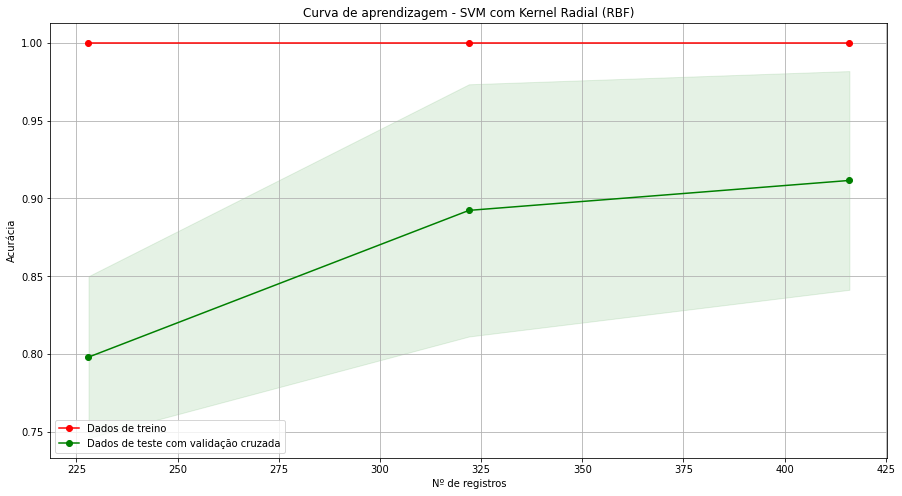

In [94]:
plot_learning_curve(modelo_svm, title='Curva de aprendizagem - SVM com Kernel Radial (RBF)', 
                    X=X, y=y, cv=5, n_jobs=-1)
                     
plt.show()

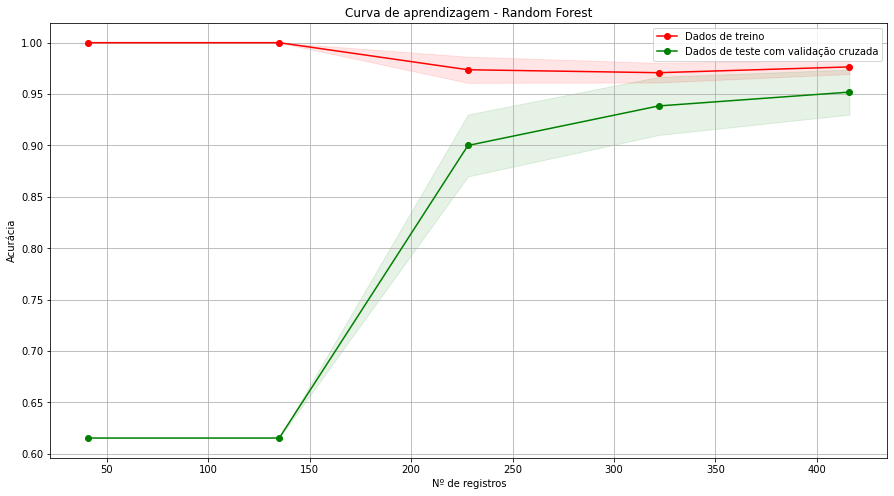

In [95]:
plot_learning_curve(modelo_rf, title='Curva de aprendizagem - Random Forest', 
                    X=X, y=y, cv=5, n_jobs=-1)
                     
plt.show()

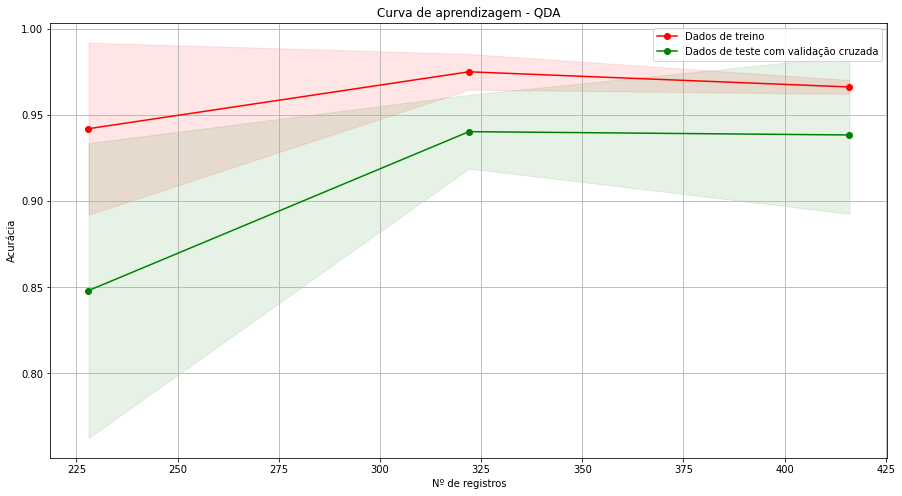

In [96]:
plot_learning_curve(modelo_qda, title='Curva de aprendizagem - QDA', 
                    X=X, y=y, cv=5, n_jobs=-1) 
plt.show()

### Realizando previsões com o modelo final

In [87]:
# instanciando novos dados para realizarmos a predição com o modelo
nova_pessoa = pd.DataFrame({
    'Idade':[56], 
    'Gênero':['Male'], 
    'Poliúria':['No'], 
    'Polidispsia':['No'], 
    'Perda repentina de peso':['Yes'], 
    'Fraqueza':['Yes'], 
    'Polifagia':['Yes'], 
    'Candidiase':['Yes'], 
    'Visão embaçada':['No'], 
    'Coceira':['No'], 
    'Irritações':['No'], 
    'Cicatrização prolongada':['Yes'], 
    'Paralisia parcial':['Yes'], 
    'Fraqueza muscular':['No'], 
    'Calvice':['No'], 
    'Obesidade':['Yes']
})

In [88]:
# visualizando os dados
nova_pessoa

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,56,Male,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,Yes


In [89]:
type(nova_pessoa)

pandas.core.frame.DataFrame

In [90]:
# repetindo o pré-processamento dos dados
for col in nova_pessoa.select_dtypes(include='object').columns:
  if col == 'Gênero':
    nova_pessoa[col] = nova_pessoa[col].map({'Female': 0, 
                                             'Male': 1})
  else:
    nova_pessoa[col] = nova_pessoa[col].map({'No': 0, 'Yes': 1})

In [91]:
nova_pessoa

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade
0,56,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1


In [97]:
# fazendo previsões
# lembrando que {0: 'Negative', 1: 'Positive'} para a previsão de diabetes
modelo_rf.predict(nova_pessoa)

array([0], dtype=int8)

In [98]:
cv_scores = cross_val_score(modelo_rf, X, y, 
                            cv=5, scoring='roc_auc')

print(f'{np.mean(cv_scores).round(4)*100}%')

98.09%


### Considerações finais

- Apesar de o modelo ter obtido uma precisão elevada __(AUC --> 98,09%)__, ele pode não ser representativo. Foram coletados poucos registros de pessoas de um único hospital, de uma única cidade, de um único país. Não foram encontradas informações sobre a coleta de dados, que pode conter um viés de amostragem. Seria interessante, para um projeto futuro, aplicar testes inferenciais estatísticas para avaliar se essa amostra do conjunto de dados se extende para a população como um todo.

- Outros fatores que não estavam presentes no conjunto de dados originais podem ser relevantes para o desenvolvimento de diabates, como hábitos alimentares e estilo de vida. Coletar maiores informações talvez ajudaria a ter um modelo mais generalizável e próximo do problema de negócio.

- Existem outras técnicas que poderiam ser aplicadas como `OneHotEncoding` para avaliar a influência de cada categoria `(sim/não, masculino/feminino)` de forma isolada no modelo.

### Referência de material para estudos

- Golbal Report on Diabetes (WHO): https://www.who.int/diabetes/global-report/en/

- Diabetes - sintomas, causas e tratamentos (Ministério da Saúde): http://antigo.saude.gov.br/saude-de-a-z/diabetes

### Explorando outra abordagem para o problema

Iremos dividir os dados para modelagem do modelo e uma parte para teste final.

In [99]:
# dados para modelagem
data_modeling = diabetes.sample(frac=0.8, random_state=42)

# dados para teste
data_test = diabetes.drop(data_modeling.index)

# resetando os índices dos conjuntos de dados - modelagem e teste
data_modeling.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

# visualizando a dimensão dos conjuntos de dados
print('Dados para modelagem:' + str(data_modeling.shape))
print('Dados para teste do modelo:' + str(data_test.shape))

Dados para modelagem:(416, 17)
Dados para teste do modelo:(104, 17)


In [100]:
# visualizando o nome e a quantidade de atributos
print(
    'Total de colunas:', len(data_modeling.columns),
    ' | ',
    data_modeling.columns
)

Total de colunas: 17  |  Index(['Idade', 'Gênero', 'Poliúria', 'Polidispsia', 'Perda repentina de peso',
       'Fraqueza', 'Polifagia', 'Candidiase', 'Visão embaçada', 'Coceira',
       'Irritações', 'Cicatrização prolongada', 'Paralisia parcial',
       'Fraqueza muscular', 'Calvice', 'Obesidade', 'Diabetes'],
      dtype='object')


In [101]:
# visualizando as 5 primeiras linhas do dados para modelagem
data_modeling[:5]

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
1,40,Female,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,Positive
2,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
3,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
4,45,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Positive


In [102]:
# realizando a conversão dos dados para categóricos para numéricos
for col in data_modeling.select_dtypes(include='object').columns:
  data_modeling[col] = data_modeling[col].astype('category')

  # imprimindo o mapeamento
  print(col, '\t', dict(enumerate(data_modeling[col].cat.categories)), end='\n\n')

  data_modeling[col] = data_modeling[col].cat.codes

Gênero 	 {0: 'Female', 1: 'Male'}

Poliúria 	 {0: 'No', 1: 'Yes'}

Polidispsia 	 {0: 'No', 1: 'Yes'}

Perda repentina de peso 	 {0: 'No', 1: 'Yes'}

Fraqueza 	 {0: 'No', 1: 'Yes'}

Polifagia 	 {0: 'No', 1: 'Yes'}

Candidiase 	 {0: 'No', 1: 'Yes'}

Visão embaçada 	 {0: 'No', 1: 'Yes'}

Coceira 	 {0: 'No', 1: 'Yes'}

Irritações 	 {0: 'No', 1: 'Yes'}

Cicatrização prolongada 	 {0: 'No', 1: 'Yes'}

Paralisia parcial 	 {0: 'No', 1: 'Yes'}

Fraqueza muscular 	 {0: 'No', 1: 'Yes'}

Calvice 	 {0: 'No', 1: 'Yes'}

Obesidade 	 {0: 'No', 1: 'Yes'}

Diabetes 	 {0: 'Negative', 1: 'Positive'}



In [103]:
# separando as variáveis explicativas (X) e a variável resposta/alvo (y)
X = data_modeling.drop(['Diabetes'], axis=1)
y = data_modeling['Diabetes']

In [104]:
# separando o conjunto de dados em treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

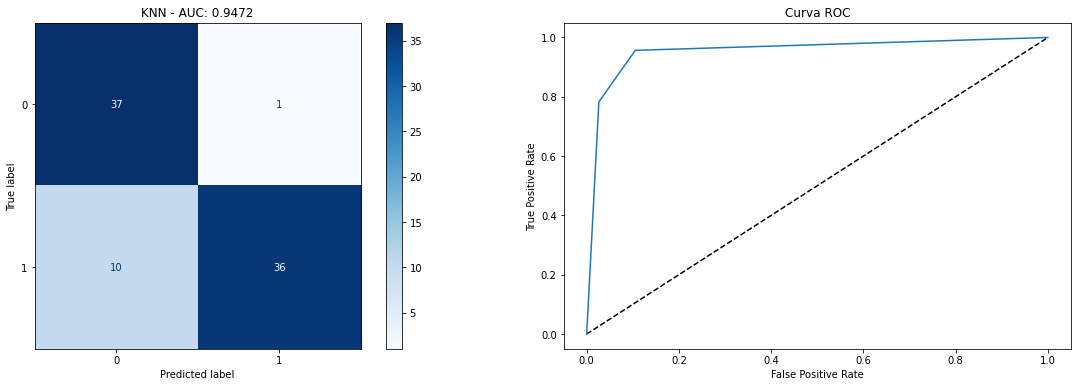

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        38
           1       0.97      0.78      0.87        46

    accuracy                           0.87        84
   macro avg       0.88      0.88      0.87        84
weighted avg       0.89      0.87      0.87        84

----------------------------------------------------------------------------------------------------------------------------------



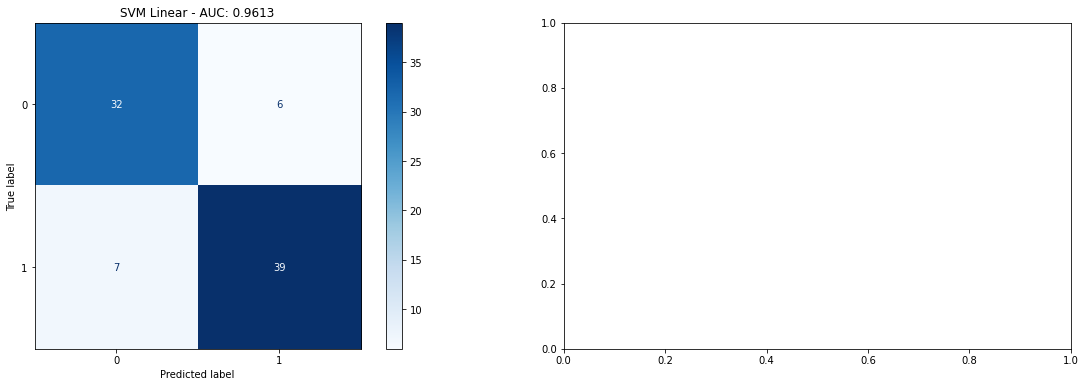

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.87      0.85      0.86        46

    accuracy                           0.85        84
   macro avg       0.84      0.84      0.84        84
weighted avg       0.85      0.85      0.85        84

----------------------------------------------------------------------------------------------------------------------------------



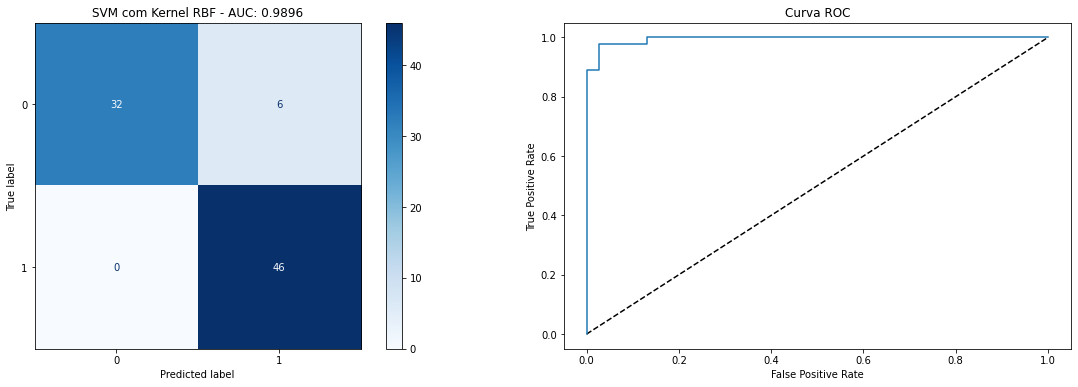

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       0.88      1.00      0.94        46

    accuracy                           0.93        84
   macro avg       0.94      0.92      0.93        84
weighted avg       0.94      0.93      0.93        84

----------------------------------------------------------------------------------------------------------------------------------



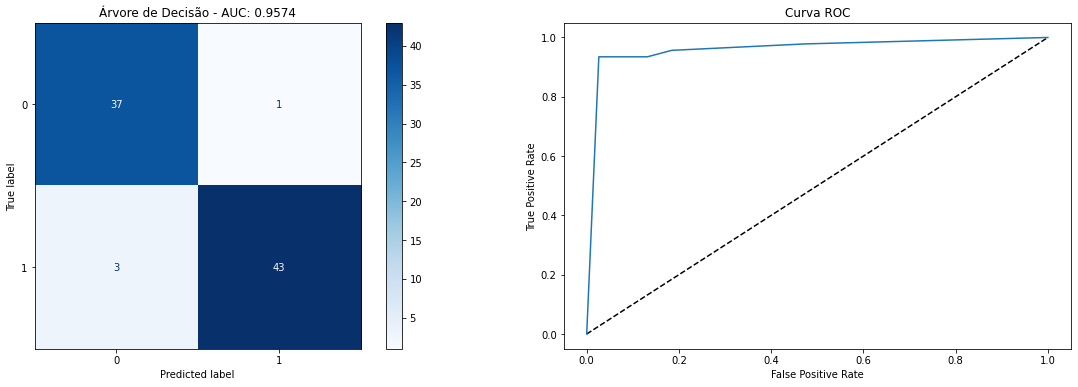

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.98      0.93      0.96        46

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

----------------------------------------------------------------------------------------------------------------------------------



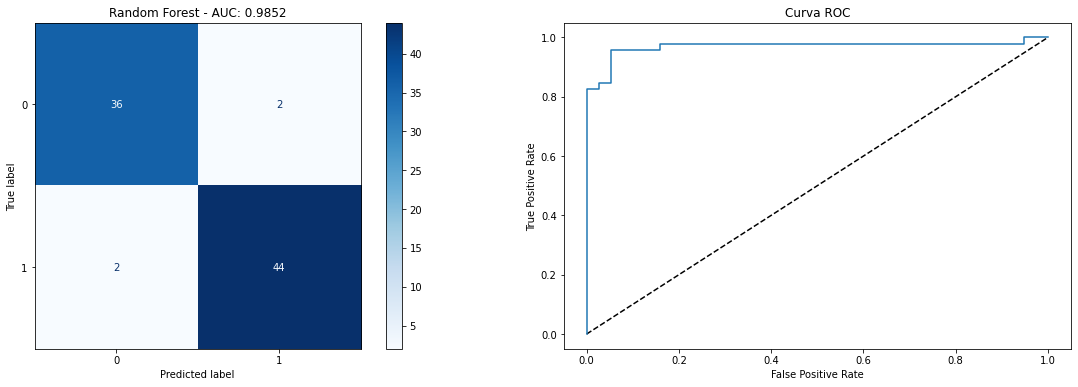

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.96      0.96      0.96        46

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84

----------------------------------------------------------------------------------------------------------------------------------



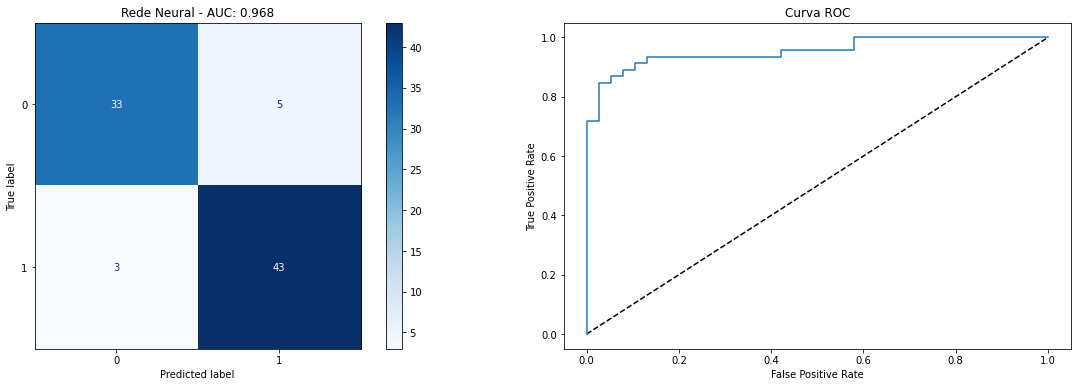

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.90      0.93      0.91        46

    accuracy                           0.90        84
   macro avg       0.91      0.90      0.90        84
weighted avg       0.91      0.90      0.90        84

----------------------------------------------------------------------------------------------------------------------------------



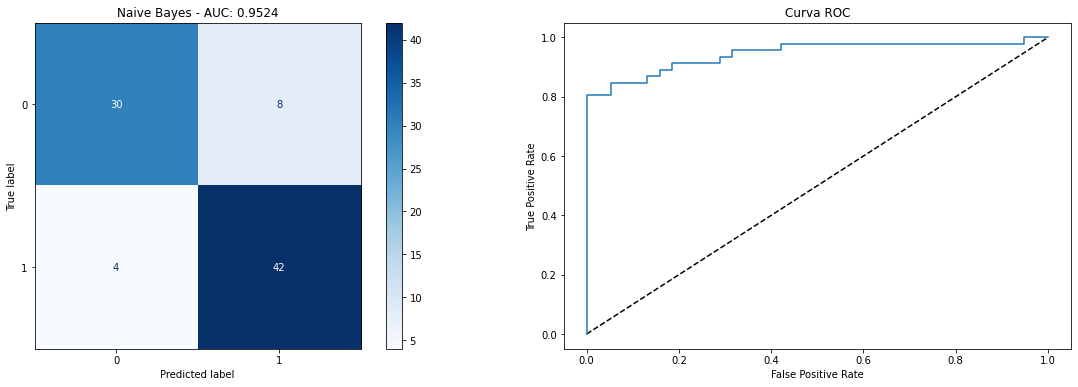

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        38
           1       0.84      0.91      0.87        46

    accuracy                           0.86        84
   macro avg       0.86      0.85      0.85        84
weighted avg       0.86      0.86      0.86        84

----------------------------------------------------------------------------------------------------------------------------------



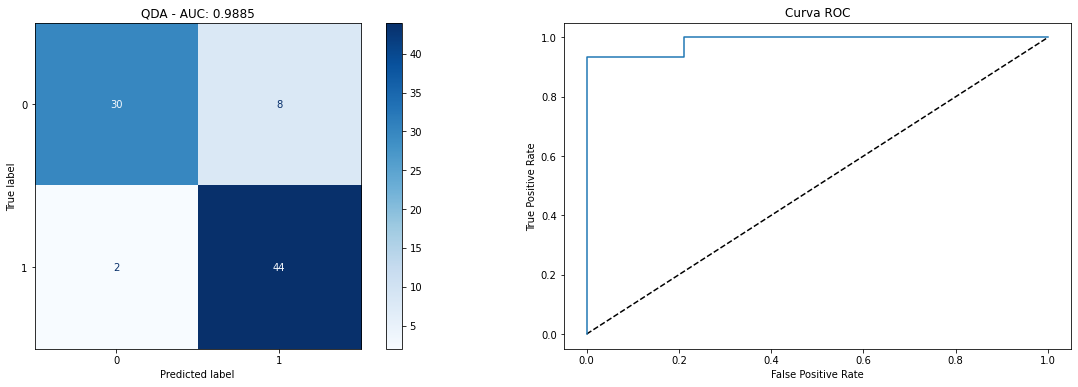

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        38
           1       0.85      0.96      0.90        46

    accuracy                           0.88        84
   macro avg       0.89      0.87      0.88        84
weighted avg       0.89      0.88      0.88        84

----------------------------------------------------------------------------------------------------------------------------------



In [105]:
# treinando os classificadores
for name, clf in clfs.items():

  # treina o modelo
  clf.fit(X_train, y_train)

  # calcula a métrica AUC
  cv_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
  
  auc = np.mean(cv_auc).round(4)
  
  # realiza previsões com o modelo
  y_pred = clf.predict(X_val)

  # plota matriz de confusão
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
  
  plot_confusion_matrix(clf, X_val, y_val, ax=ax1, cmap='Blues')
  ax1.set_title(f'{name} - AUC: {auc}')

  # plota a curva quando algoritmo cálcula as probabilidades
  if hasattr(clf, 'predict_proba'):

    # previsões de probabilidades para cada classe
    y_pred_prob = clf.predict_proba(X_val)[:, 1]

    # gera dados para curva ROC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    
    # plota curva ROC
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.plot(fpr, tpr)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'Curva ROC')

  # apresenta o plot
  plt.show()

  # imprime todas as métricas do modelo
  print(classification_report(y_val, y_pred), end='\n')
  print('-'*130, end='\n\n')

In [106]:
# selecionando os 3 modelos mais promissores

# SVM com kernel RBF
svm = SVC(gamma=2, C=1, probability=True, random_state=42)
modelo_svm = svm.fit(X_train, y_train)

# Random Forest
rf =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10, random_state=42)
modelo_rf = rf.fit(X_train, y_train)

# Análise Discriminante Quadrática
qda = QuadraticDiscriminantAnalysis()
modelo_qda = qda.fit(X_train, y_train)

Agora iremos plotar a `curva de aprendizagem` dos modelos mais promissores e, interpretar os seus resultados. Por fim, a partir da análise realizada, escolheremos o modelo final.

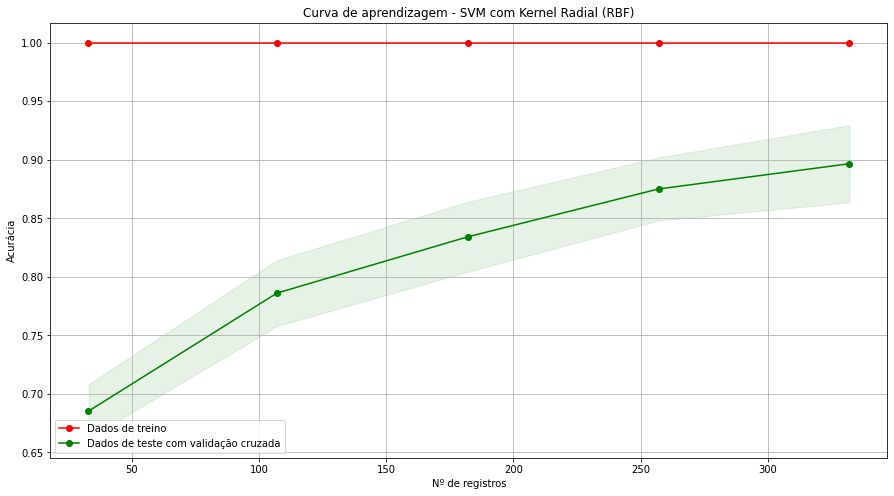

In [107]:
plot_learning_curve(modelo_svm, title='Curva de aprendizagem - SVM com Kernel Radial (RBF)', 
                    X=X, y=y, cv=5, n_jobs=-1)
                     
plt.show()

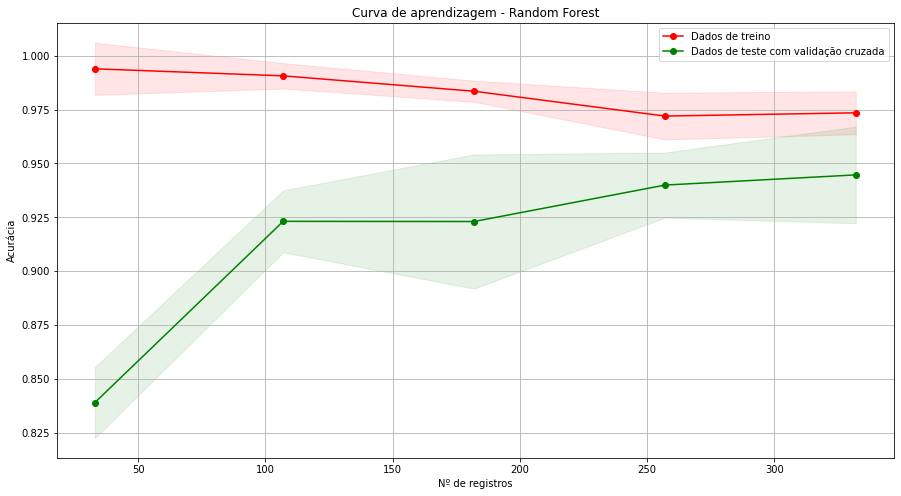

In [108]:
plot_learning_curve(modelo_rf, title='Curva de aprendizagem - Random Forest', 
                    X=X, y=y, cv=5, n_jobs=-1)
                     
plt.show()

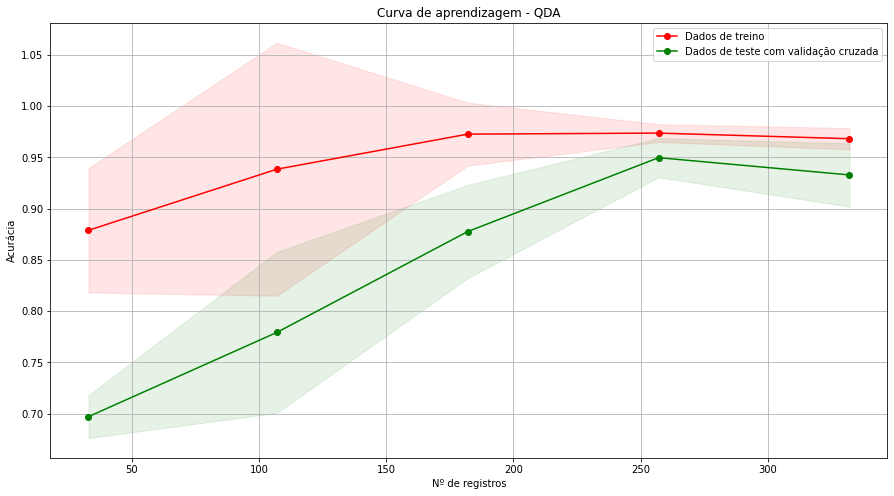

In [109]:
plot_learning_curve(modelo_qda, title='Curva de aprendizagem - QDA', 
                    X=X, y=y, cv=5, n_jobs=-1) 
plt.show()

In [110]:
# visualizando o conjunto de dados de teste
data_test

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
1,61,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Positive
2,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
3,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
4,49,Male,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
100,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
101,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
102,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive


In [111]:
# criando uma cópia dos dados de teste (data_test)
data_test_copy = data_test.copy()

# visualizando a cópia criada
data_test_copy

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
0,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
1,61,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Positive
2,62,Male,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,Positive
3,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
4,49,Male,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,44,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
100,35,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
101,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
102,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive


In [112]:
# repetindo o pré-processamento dos dados
for col in data_test_copy.select_dtypes(include='object').columns:
    if col == 'Gênero':
        data_test_copy[col] = data_test_copy[col].map({'Female': 0, 'Male': 1})
    
    elif col == 'Diabetes':
        data_test_copy[col] = data_test_copy[col].map({'Negative': 0, 'Positive': 1})

    else:
        data_test_copy[col] = data_test_copy[col].map({'No': 0, 'Yes': 1})

In [125]:
# sorteando um dado aleatório do "data_test"
test = data_test_copy.sample(1)
test

,Idade,Gênero,Poliúria,Polidispsia,Perda repentina de peso,Fraqueza,Polifagia,Candidiase,Visão embaçada,Coceira,Irritações,Cicatrização prolongada,Paralisia parcial,Fraqueza muscular,Calvice,Obesidade,Diabetes
93,43,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0


In [126]:
# visualizando o tipo do objeto
type(test)

pandas.core.frame.DataFrame

In [127]:
# visualizando o tipo de dado em cada atributo
test.dtypes

Idade                      int64
Gênero                     int64
Poliúria                   int64
Polidispsia                int64
Perda repentina de peso    int64
Fraqueza                   int64
Polifagia                  int64
Candidiase                 int64
Visão embaçada             int64
Coceira                    int64
Irritações                 int64
Cicatrização prolongada    int64
Paralisia parcial          int64
Fraqueza muscular          int64
Calvice                    int64
Obesidade                  int64
Diabetes                   int64
dtype: object

In [128]:
# excluindo a variável "Diabetes" e transformando os dados em um vetor (array)
test = test.drop('Diabetes', axis=1).values
test

array([[43,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0]])

In [129]:
# fazendo previsões com os dados acima
# lembrando que {0: 'Negative', 1: 'Positive'} para a previsão de diabetes
modelo_rf.predict(test)

array([0], dtype=int8)

In [130]:
# visualizando acurácia final do modelo
cv_scores = cross_val_score(modelo_rf, X, y, 
                            cv=5, scoring='roc_auc')

print(f'{np.mean(cv_scores).round(4)*100}%')

98.52%
